In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix




In [14]:
# Load the dataset (adjust path if needed)
df = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Overview of the data
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [16]:
# Descriptive statistics
df.describe()


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


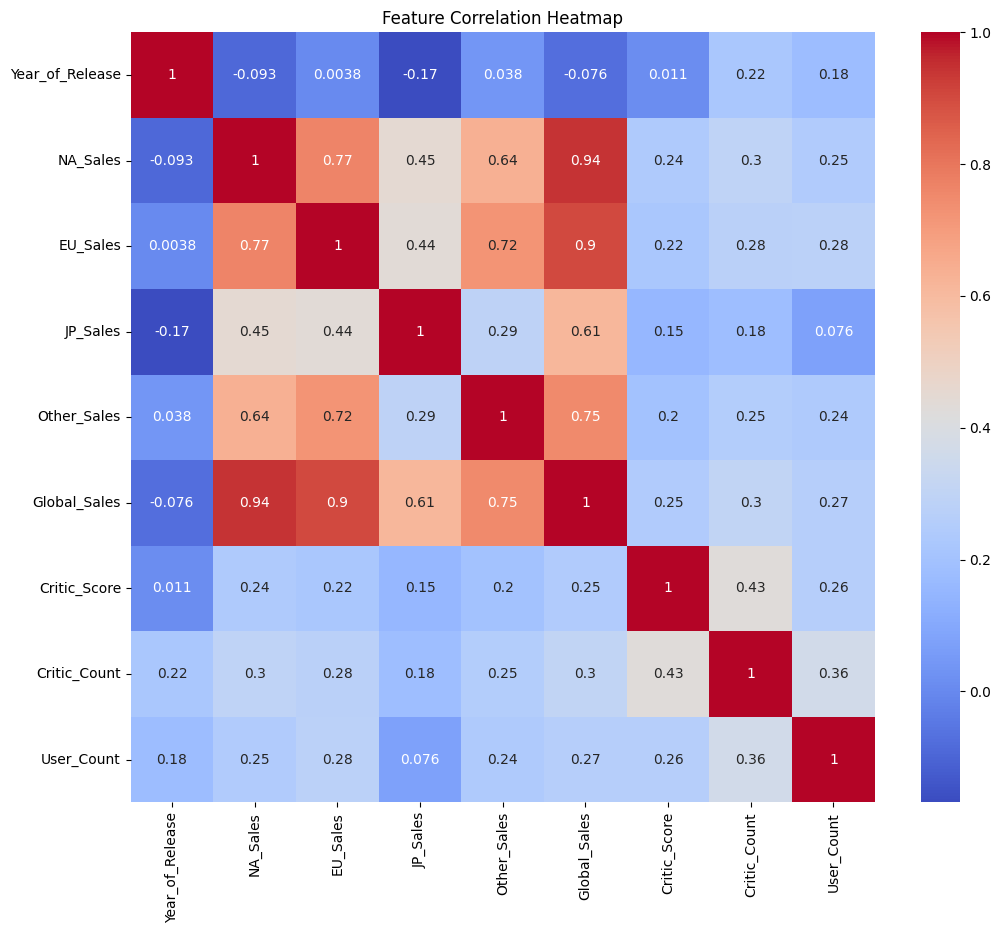

In [17]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [18]:
# Drop rows with missing values for simplicity
df = df.dropna(subset=['Critic_Score', 'User_Score', 'Global_Sales'])
# Encoding categorical data if necessary
df = pd.get_dummies(df, columns=['Platform', 'Genre', 'Publisher'])


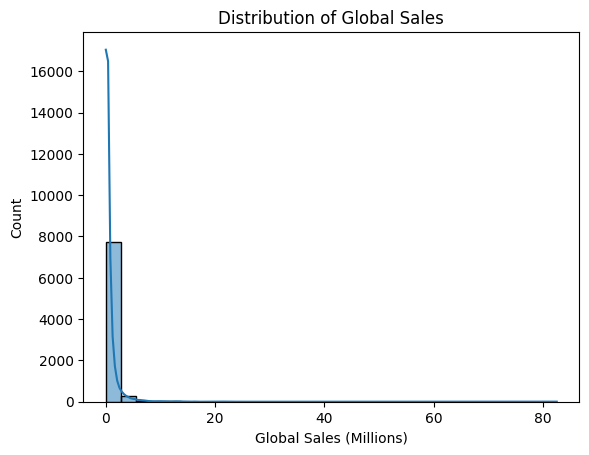

In [19]:
# Distribution of Global Sales
sns.histplot(df['Global_Sales'], bins=30, kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales (Millions)')
plt.show()


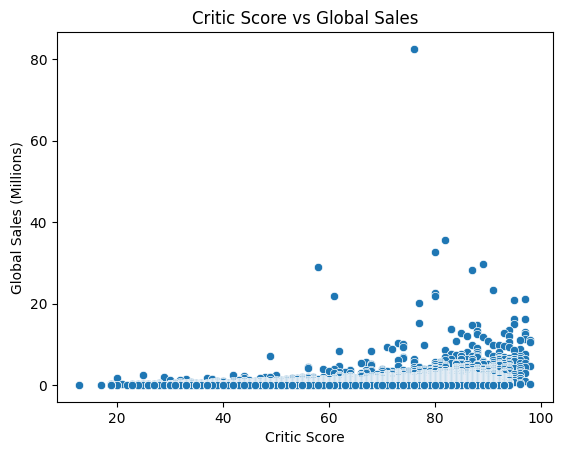

In [20]:
# Relationship between Critic Score and Global Sales
sns.scatterplot(x='Critic_Score', y='Global_Sales', data=df)
plt.title('Critic Score vs Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (Millions)')
plt.show()


In [21]:
# Selecting features for clustering
features = df[['Critic_Score', 'User_Score', 'Global_Sales']].copy()

# Normalizing 'User_Score' if needed
features['User_Score'] = pd.to_numeric(features['User_Score'], errors='coerce')

# Drop rows with missing values
features = features.dropna()

# KMeans clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)

# Filter the main DataFrame accordingly
df_filtered = df.loc[features.index].copy()
df_filtered['game_type'] = clusters

# Now df_filtered is your DataFrame ready for further analysis

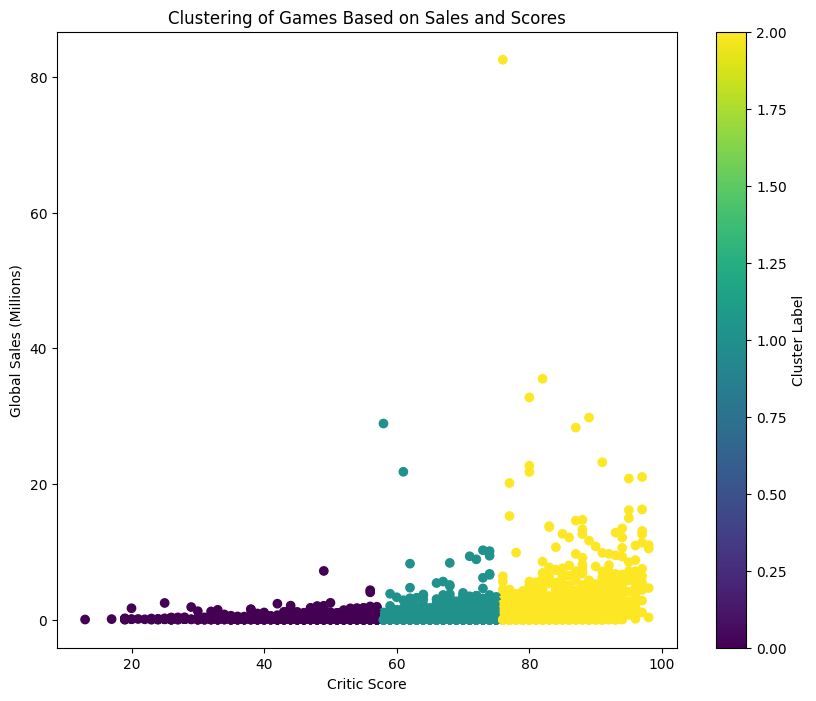

In [22]:
plt.figure(figsize=(10,8))
plt.scatter(features['Critic_Score'], features['Global_Sales'], c=df_filtered['game_type'], cmap='viridis')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (Millions)')
plt.title('Clustering of Games Based on Sales and Scores')
plt.colorbar(label='Cluster Label')
plt.show()

In [23]:
# Defining high sales as >1 million copies
df['High_Sales'] = df['Global_Sales'] > 1

# Preparing features and labels
X = features[['Critic_Score', 'User_Score']]
y = df.loc[features.index, 'High_Sales']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

       False       0.84      0.93      0.89      1130
        True       0.50      0.27      0.35       274

    accuracy                           0.81      1404
   macro avg       0.67      0.60      0.62      1404
weighted avg       0.78      0.81      0.78      1404



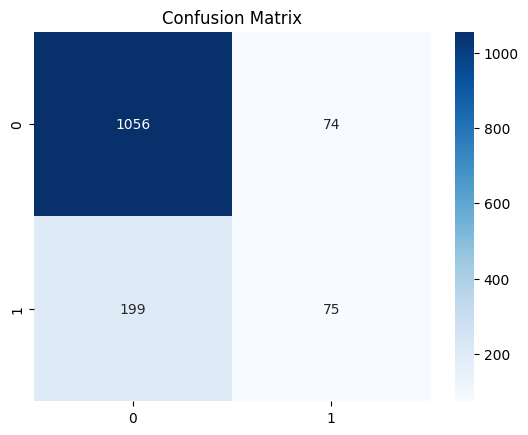

In [24]:
# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# Project Summary
This project analyzes the 'Video Game Sales with Ratings' dataset to understand factors influencing game sales performance.
Key steps included:
- Initial data exploration and cleaning
- Behavioral analysis of critic and user scores against sales
- Game clustering based on performance metrics
- Predicting high sales potential using Random Forest classification
